In [1]:
import numpy as np
import matplotlib.pyplot as plt

from tensorflow import keras

In [2]:
def read_ucr(file):
    data = np.loadtxt(file, delimiter="\t")
    y = data[:, 0]
    x = data[:, 1:]
    return x, y.astype(int)

root_url = r".\data\FordA"
x_train, y_train = read_ucr(root_url + r"\FordA_TRAIN.tsv")
x_test, y_test = read_ucr(root_url + r"\FordA_TEST.tsv")

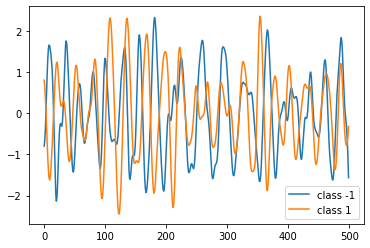

In [3]:
classes = np.unique(np.concatenate((y_train, y_test), axis=0))

plt.figure()
for cl in classes:
    cl_x_train = x_train[y_train == cl]
    plt.plot(cl_x_train[0], label="class " + str(cl))
plt.legend(loc="best")
plt.show()
plt.close()

In [4]:
x_train = x_train.reshape((x_train.shape[0], x_train.shape[1], 1))
x_test = x_test.reshape((x_test.shape[0], x_test.shape[1], 1))

In [5]:
num_classes = len(np.unique(y_train))

In [6]:
idx = np.random.permutation(len(x_train))
x_train = x_train[idx]
y_train = y_train[idx]

In [7]:
y_train[y_train == -1] = 0
y_test[y_test == -1] = 0

In [8]:
%%time
def make_model(input_shape):
    input_layer = keras.layers.Input(input_shape)
    
    conv1 = keras.layers.Conv1D(filters=64, kernel_size=3, padding='same')(input_layer)
    conv1 = keras.layers.BatchNormalization()(conv1)
    conv1 = keras.layers.ReLU()(conv1)
    
    conv2 = keras.layers.Conv1D(filters=64, kernel_size=3, padding='same')(conv1)
    conv2 = keras.layers.BatchNormalization()(conv2)
    conv2 = keras.layers.ReLU()(conv2)
    
    conv3 = keras.layers.Conv1D(filters=64, kernel_size=3, padding='same')(conv2)
    conv3 = keras.layers.BatchNormalization()(conv3)
    conv3 = keras.layers.ReLU()(conv3)
    
    gap = keras.layers.GlobalAveragePooling1D()(conv3)
    
    output_layer = keras.layers.Dense(num_classes, activation='softmax')(gap)
    
    return keras.models.Model(inputs=input_layer, outputs=output_layer)   

Wall time: 0 ns


In [9]:
%%time
model = make_model(input_shape=x_train.shape[1:])
keras.utils.plot_model(model, show_shapes=True)

('Failed to import pydot. You must `pip install pydot` and install graphviz (https://graphviz.gitlab.io/download/), ', 'for `pydotprint` to work.')
Wall time: 11.9 s


In [10]:
%%time 
epochs = 500
batch_size = 12

callbacks = [
    keras.callbacks.ModelCheckpoint("best_model.h5", save_best_only=True, monitor='val_loss'),
    keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=20, min_lr=0.0001),
    keras.callbacks.EarlyStopping(monitor='val_loss', patience=50, verbose=1),
]

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['sparse_categorical_accuracy'],
)

history = model.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.2,
    verbose=1,
)

Epoch 1/500
240/240 [==============================] - 8s 34ms/step - loss: 0.5468 - sparse_categorical_accuracy: 0.7094 - val_loss: 0.7594 - val_sparse_categorical_accuracy: 0.4646
Epoch 2/500
240/240 [==============================] - 6s 27ms/step - loss: 0.4679 - sparse_categorical_accuracy: 0.7618 - val_loss: 0.6752 - val_sparse_categorical_accuracy: 0.5784
Epoch 3/500
240/240 [==============================] - 5s 20ms/step - loss: 0.4492 - sparse_categorical_accuracy: 0.7809 - val_loss: 0.6844 - val_sparse_categorical_accuracy: 0.6616
Epoch 4/500
240/240 [==============================] - 5s 22ms/step - loss: 0.4378 - sparse_categorical_accuracy: 0.7840 - val_loss: 0.4676 - val_sparse_categorical_accuracy: 0.7406
Epoch 5/500
240/240 [==============================] - 5s 21ms/step - loss: 0.4224 - sparse_categorical_accuracy: 0.7944 - val_loss: 0.3920 - val_sparse_categorical_accuracy: 0.8141
Epoch 6/500
240/240 [==============================] - 5s 21ms/step - loss: 0.4079 - spars

240/240 [==============================] - 5s 20ms/step - loss: 0.2109 - sparse_categorical_accuracy: 0.9156 - val_loss: 1.1233 - val_sparse_categorical_accuracy: 0.5728
Epoch 41/500
240/240 [==============================] - 5s 20ms/step - loss: 0.2055 - sparse_categorical_accuracy: 0.9212 - val_loss: 0.2482 - val_sparse_categorical_accuracy: 0.8821oss: 0.1952 - spa
Epoch 42/500
240/240 [==============================] - 5s 20ms/step - loss: 0.2051 - sparse_categorical_accuracy: 0.9149 - val_loss: 1.9071 - val_sparse_categorical_accuracy: 0.5950
Epoch 43/500
240/240 [==============================] - 5s 20ms/step - loss: 0.2075 - sparse_categorical_accuracy: 0.9208 - val_loss: 0.3582 - val_sparse_categorical_accuracy: 0.8225
Epoch 44/500
240/240 [==============================] - 5s 20ms/step - loss: 0.1902 - sparse_categorical_accuracy: 0.9292 - val_loss: 2.7995 - val_sparse_categorical_accuracy: 0.5354- sparse_categorical_accuracy: 0.92
Epoch 45/500
240/240 [========================

240/240 [==============================] - 5s 19ms/step - loss: 0.1014 - sparse_categorical_accuracy: 0.9632 - val_loss: 0.1596 - val_sparse_categorical_accuracy: 0.9348 sparse_categorical_accuracy:  - ETA: 2s - loss: 0.10
Epoch 80/500
240/240 [==============================] - 5s 19ms/step - loss: 0.1004 - sparse_categorical_accuracy: 0.9639 - val_loss: 0.1766 - val_sparse_categorical_accuracy: 0.9251
Epoch 81/500
240/240 [==============================] - 5s 20ms/step - loss: 0.1028 - sparse_categorical_accuracy: 0.9642 - val_loss: 0.1114 - val_sparse_categorical_accuracy: 0.9695 0s - loss: 0.1017 - sparse_categorical_accu
Epoch 82/500
240/240 [==============================] - 5s 20ms/step - loss: 0.1015 - sparse_categorical_accuracy: 0.9688 - val_loss: 0.1083 - val_sparse_categorical_accuracy: 0.9667- loss: 0.1025 - sparse_categorical_accuracy:
Epoch 83/500
240/240 [==============================] - 5s 20ms/step - loss: 0.1078 - sparse_categorical_accuracy: 0.9632 - val_loss: 0.098

240/240 [==============================] - 5s 20ms/step - loss: 0.0809 - sparse_categorical_accuracy: 0.9729 - val_loss: 0.0925 - val_sparse_categorical_accuracy: 0.9723
Epoch 116/500
240/240 [==============================] - 5s 19ms/step - loss: 0.0807 - sparse_categorical_accuracy: 0.9722 - val_loss: 0.0968 - val_sparse_categorical_accuracy: 0.96670 - sparse_categorical_ac
Epoch 117/500
240/240 [==============================] - 5s 20ms/step - loss: 0.0722 - sparse_categorical_accuracy: 0.9726 - val_loss: 0.2893 - val_sparse_categorical_accuracy: 0.8918
Epoch 118/500
240/240 [==============================] - 5s 20ms/step - loss: 0.0740 - sparse_categorical_accuracy: 0.9726 - val_loss: 0.1569 - val_sparse_categorical_accuracy: 0.9473
Epoch 119/500
240/240 [==============================] - 5s 20ms/step - loss: 0.0709 - sparse_categorical_accuracy: 0.9757 - val_loss: 0.1160 - val_sparse_categorical_accuracy: 0.9556
Epoch 120/500
240/240 [==============================] - 5s 20ms/step

240/240 [==============================] - 5s 20ms/step - loss: 0.0604 - sparse_categorical_accuracy: 0.9819 - val_loss: 0.0835 - val_sparse_categorical_accuracy: 0.9736
Epoch 156/500
240/240 [==============================] - 5s 20ms/step - loss: 0.0550 - sparse_categorical_accuracy: 0.9840 - val_loss: 0.0823 - val_sparse_categorical_accuracy: 0.9778
Epoch 157/500
240/240 [==============================] - 5s 20ms/step - loss: 0.0582 - sparse_categorical_accuracy: 0.9816 - val_loss: 0.0819 - val_sparse_categorical_accuracy: 0.9764s - loss: 0.0563 - sparse_categorical_accurac - ETA: 2s - loss: 0.0576 - sparse_ca - ETA: 1s - loss: 0.0601 - sparse_categorical_accur - ETA: 0s - loss: 0.0620 - sparse_categorical_accuracy: 0.9 - ETA: 0s - loss: 0.0622 - sparse_categorical_accu
Epoch 158/500
240/240 [==============================] - 5s 20ms/step - loss: 0.0572 - sparse_categorical_accuracy: 0.9823 - val_loss: 0.0968 - val_sparse_categorical_accuracy: 0.9681
Epoch 159/500
240/240 [==========

240/240 [==============================] - 5s 20ms/step - loss: 0.0543 - sparse_categorical_accuracy: 0.9851 - val_loss: 0.0799 - val_sparse_categorical_accuracy: 0.9723al_accuracy: - ETA: 1s - loss: 0.0545 - sparse_catego
Epoch 193/500
240/240 [==============================] - 5s 20ms/step - loss: 0.0504 - sparse_categorical_accuracy: 0.9833 - val_loss: 0.0826 - val_sparse_categorical_accuracy: 0.97091s - loss: 0.0484 - sparse_cat
Epoch 194/500
240/240 [==============================] - 5s 20ms/step - loss: 0.0506 - sparse_categorical_accuracy: 0.9861 - val_loss: 0.0819 - val_sparse_categorical_accuracy: 0.9723
Epoch 195/500
240/240 [==============================] - 5s 20ms/step - loss: 0.0573 - sparse_categorical_accuracy: 0.9830 - val_loss: 0.0806 - val_sparse_categorical_accuracy: 0.9723
Epoch 196/500
240/240 [==============================] - 5s 20ms/step - loss: 0.0574 - sparse_categorical_accuracy: 0.9785 - val_loss: 0.0868 - val_sparse_categorical_accuracy: 0.9695
Epoch 197/5

In [11]:
model = keras.models.load_model("best_model.h5")
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test accuracy: {test_acc}")
print(f"Test loss: {test_loss}")

42/42 [==============================] - 1s 17ms/step - loss: 0.0915 - sparse_categorical_accuracy: 0.9689
Test accuracy: 0.9689394235610962
Test loss: 0.09147338569164276


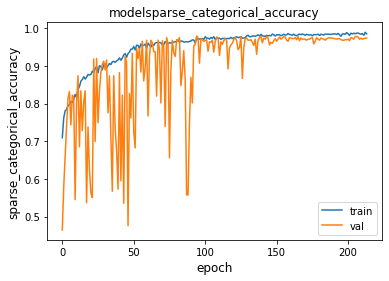

In [12]:
metric = "sparse_categorical_accuracy"
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
plt.title("model" + metric)
plt.xlabel("epoch", fontsize='large')
plt.ylabel(metric, fontsize='large')
plt.legend(['train', 'val'], loc="best")
plt.show()
plt.close()